# Nigerian Music scraped from Spotify - an analysis

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Start where we finished in the last lesson, with data imported and filtered.

In [3]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("../data/nigerian-songs.csv")
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


We will focus only on 3 genres. Maybe we can get 3 clusters built!

Text(0.5, 1.0, 'Top genres')

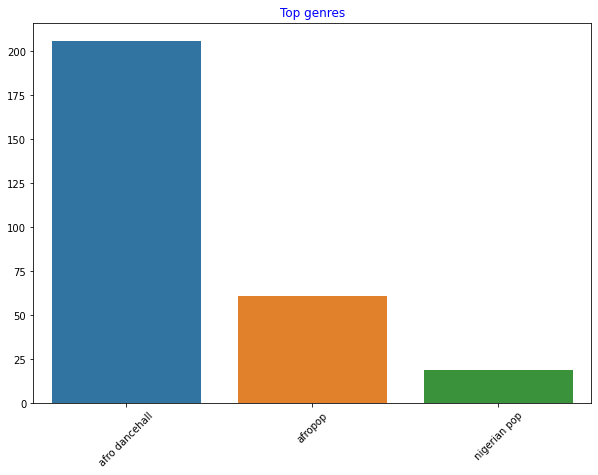

In [4]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

<AxesSubplot:xlabel='release_date'>

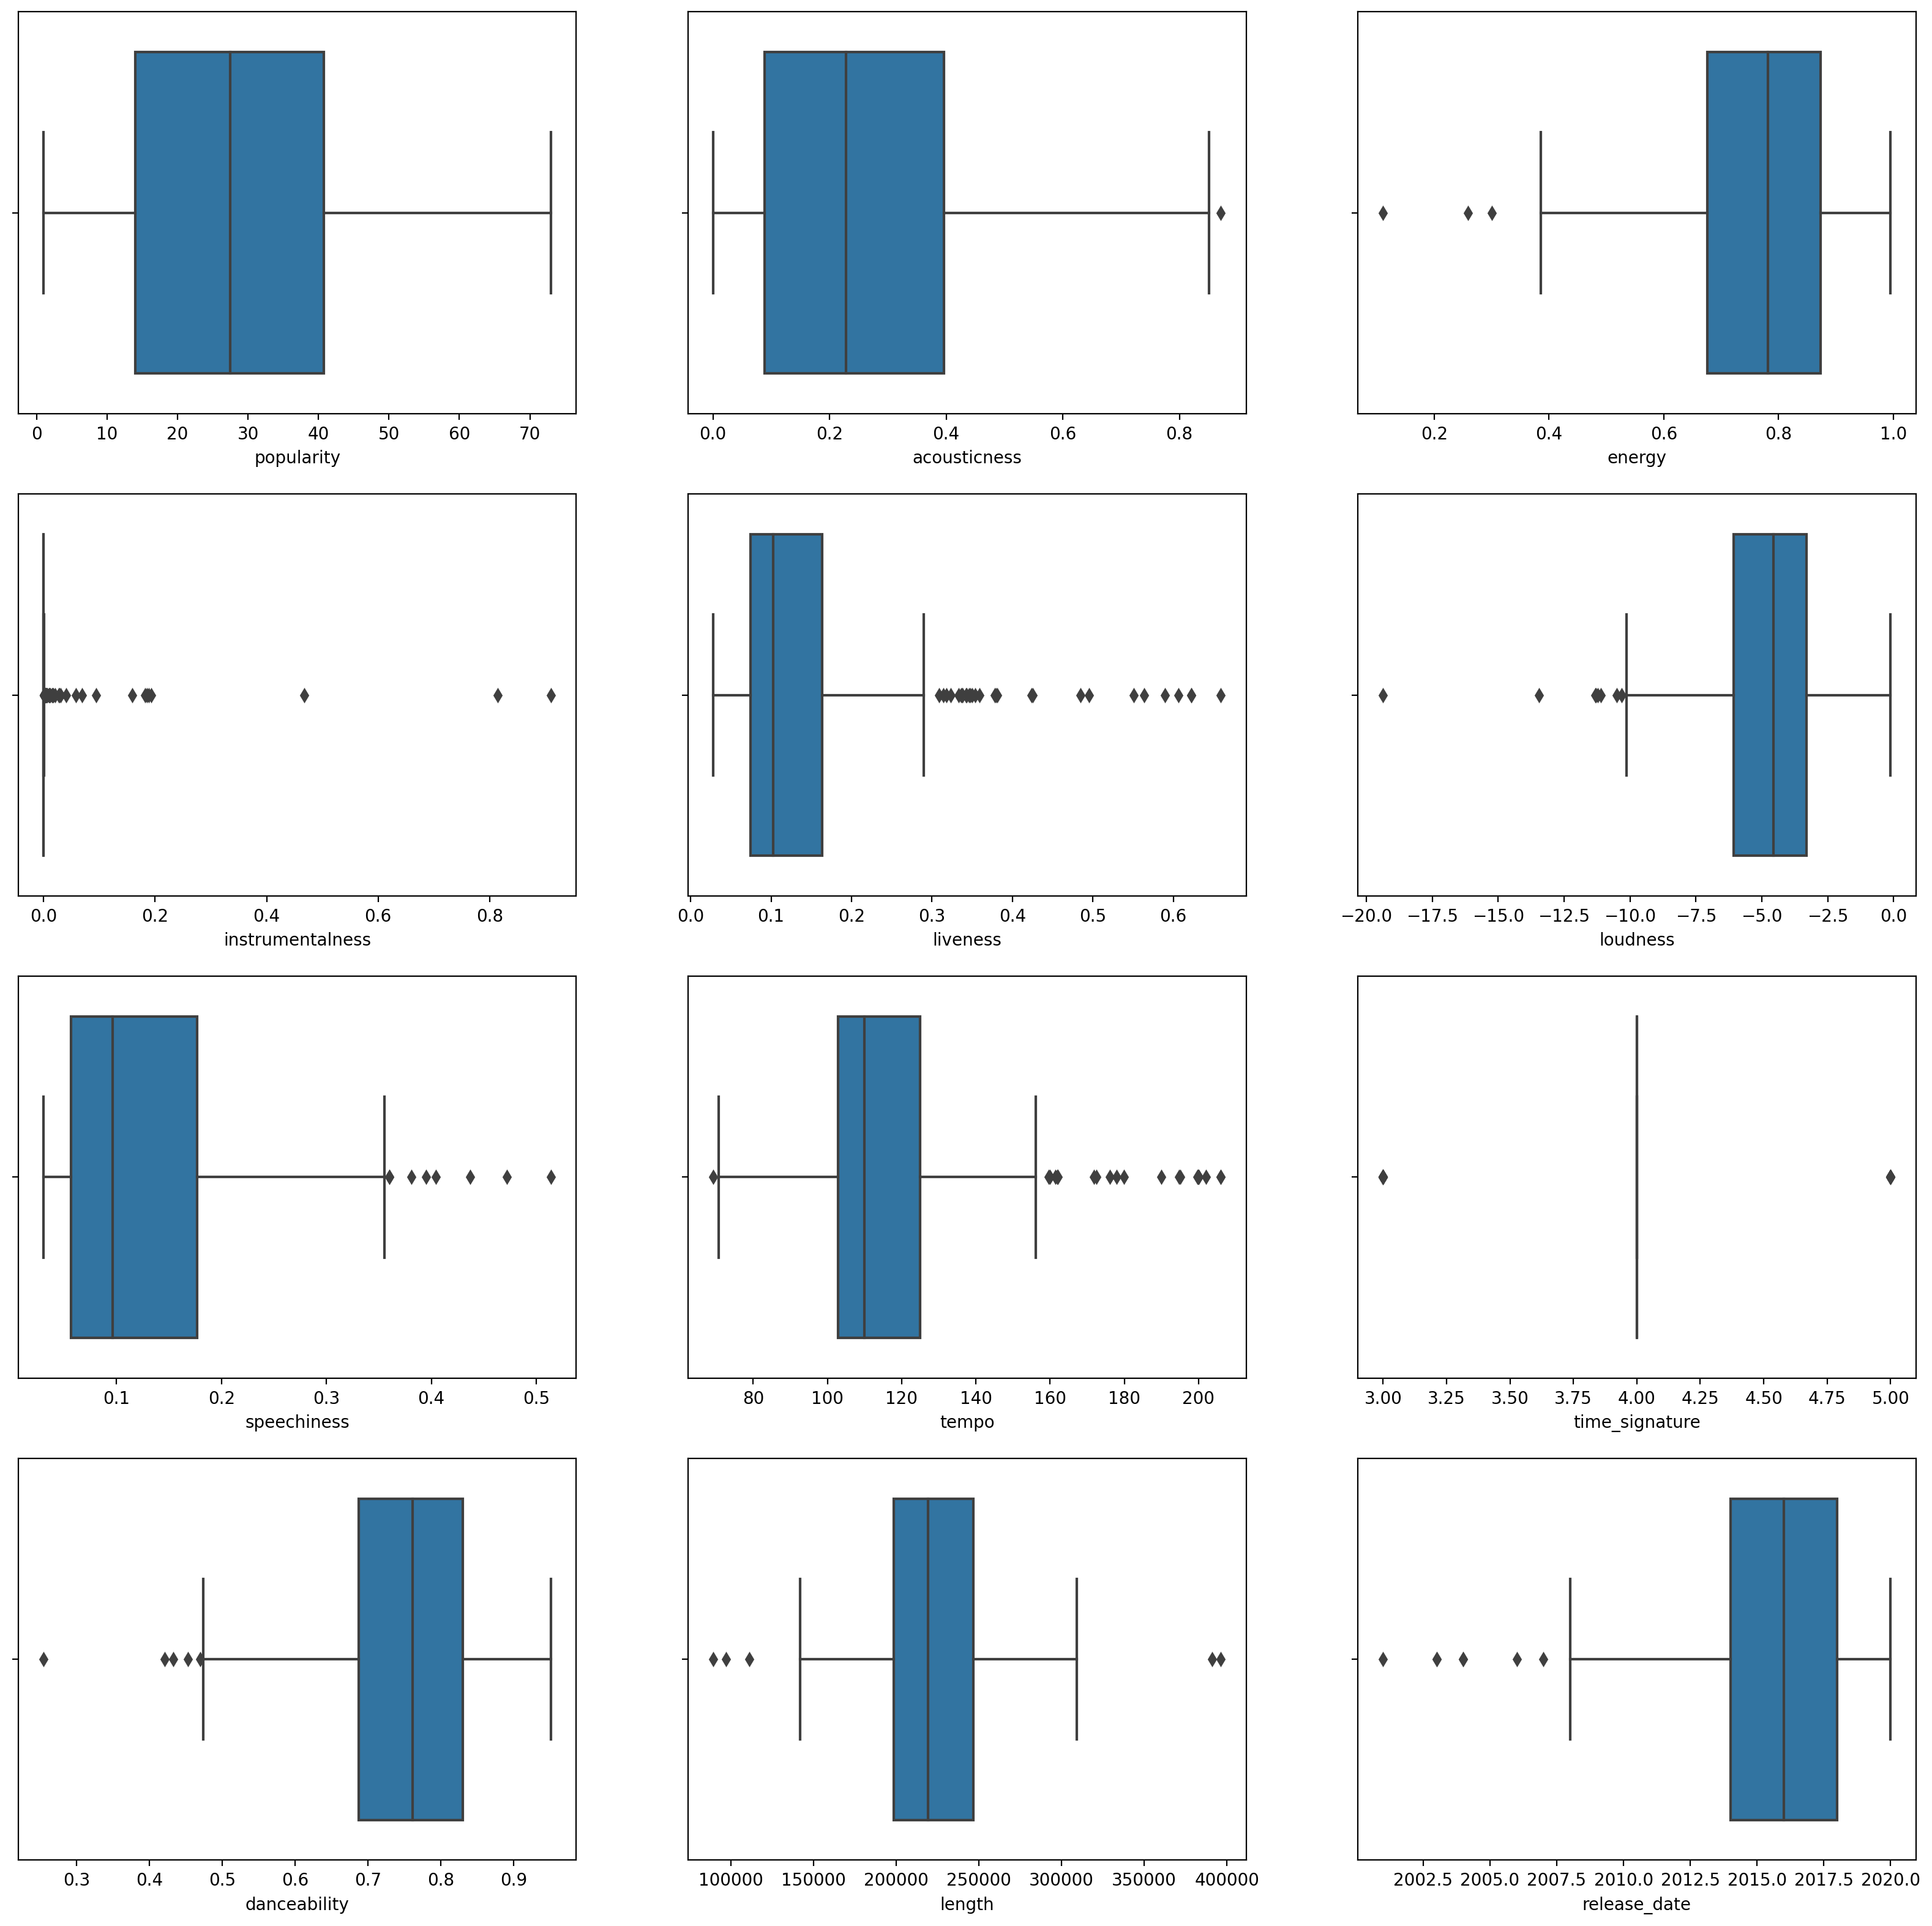

In [5]:
df.head()
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)

In [7]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

c:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1])

In [8]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5466747351275563

In [9]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


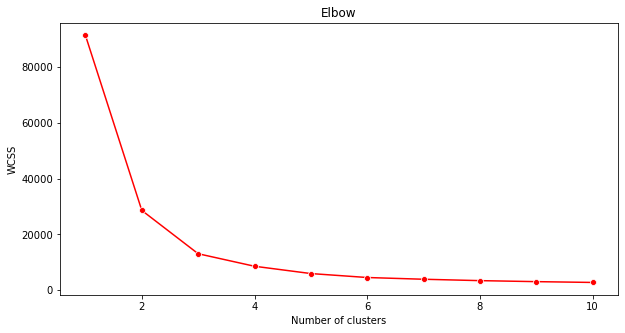

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

c:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


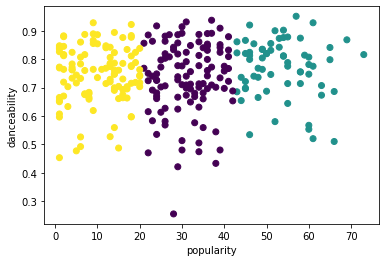

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

In [13]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 112 out of 286 samples were correctly labeled.
Accuracy score: 0.39


In [16]:
# print(X)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_new = scaler.transform(X)
print(X_new)

[[ 1.09095873  0.10310783 -0.31761805 -0.90016741 -0.29963262 -0.54750247]
 [ 2.75948383 -0.80076466  1.32474533  2.62589471 -0.01654826 -1.04953616]
 [ 1.09095873 -0.17935232 -0.38902515 -0.73366713 -0.46806573  0.49840107]
 ...
 [ 1.09095873 -1.47866904  1.19085701 -0.2016544   0.13312373  1.07713437]
 [-0.57756638 -0.12286029  1.04804281 -1.124795    0.74682059  0.93768056]
 [-0.57756638 -1.02673279 -0.09447085  1.80817145  0.97528926  1.09107975]]


c:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


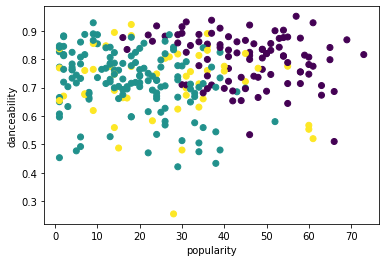

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_new)
labels = kmeans.predict(X_new)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

In [18]:
labels = kmeans.labels_
correct_labels = sum(y == labels)


print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 104 out of 286 samples were correctly labeled.
Accuracy score: 0.36


<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 1 to 525
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              286 non-null    object 
 1   album             286 non-null    object 
 2   artist            286 non-null    object 
 3   artist_top_genre  286 non-null    object 
 4   release_date      286 non-null    int64  
 5   length            286 non-null    int64  
 6   popularity        286 non-null    int64  
 7   danceability      286 non-null    float64
 8   acousticness      286 non-null    float64
 9   energy            286 non-null    float64
 10  instrumentalness  286 non-null    float64
 11  liveness          286 non-null    float64
 12  loudness          286 non-null    float64
 13  speechiness       286 non-null    float64
 14  tempo             286 non-null    float64
 15  time_signature    286 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

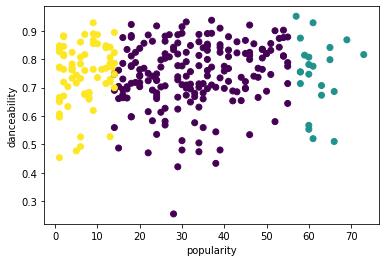

Result: 154 out of 286 samples were correctly labeled.
Accuracy score: 0.54


In [39]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, assign_labels='discretize')
labels = spectral.fit_predict(X)

plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

labels = spectral.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))
